In [1]:
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1_std_events_dens_spg.csv')

In [3]:
# Add 1850 to all 'Values' to adjust
df['Adjusted_Values'] = df['Values'] + 1850

# Define bins from 1850 to 2010 in steps of 5
bins = range(1850, 2015, 5)
labels = [f"{i} - {i+4}" for i in bins[:-1]]

# Creating the bins in the DataFrame
df['Value_bins'] = pd.cut(df['Adjusted_Values'], bins=bins, labels=labels, include_lowest=True, right=False)

# Filter data based on Condition and count occurrences
value_counts_above = df[df['Condition'] == 'Above']['Value_bins'].value_counts().sort_index()
value_counts_below = df[df['Condition'] == 'Below']['Value_bins'].value_counts().sort_index()

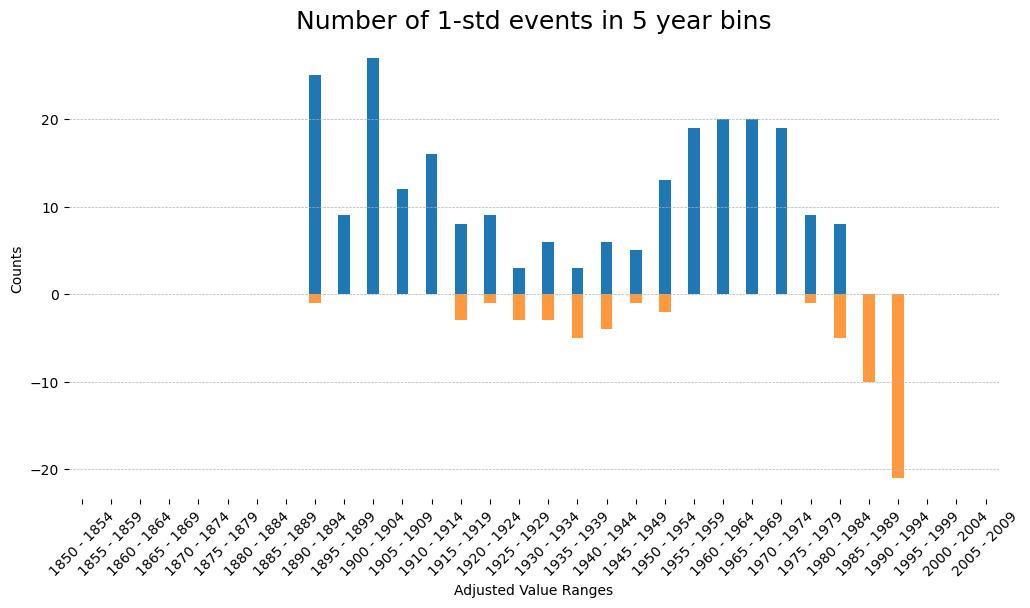

In [18]:
# Plot configuration
fig, ax = plt.subplots(figsize=(12, 6))
value_counts_above.plot(kind='bar', ax=ax, color='tab:blue', width=0.4)
(-value_counts_below).plot(kind='bar', ax=ax, color='tab:orange', alpha=0.8, width=0.4)

# Adjust title and labels
ax.set_title('Number of 1-std events in 5 year bins', fontsize=18)
ax.set_xlabel('Adjusted Value Ranges')
ax.set_ylabel('Counts')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Removing spines (frame of the plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Enhance display with grid
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)

plt.show()